In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [3]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [4]:
sales_c= df.drop(['Product Name','Product Category','Month','Year', 'Market Size', 'Marketing Expense','Month No.'],axis=1)

In [5]:
sales_c.shape

(60, 1)

In [6]:
sales_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [7]:
sales_c['Sales'].sum()

45599092

Text(0.5, 1.0, 'Product C')

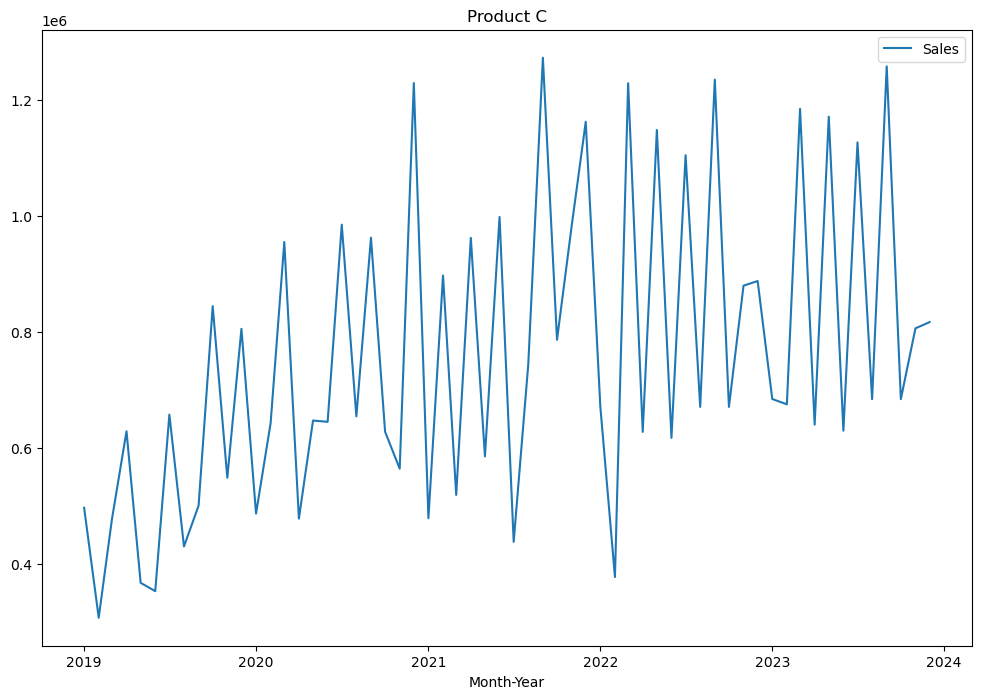

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_c)
plt.title('Product C')

In [9]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
adf_test(sales_c)

ADF Statistics: -2.8900034461607835
p- value: 0.04652287109563067
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


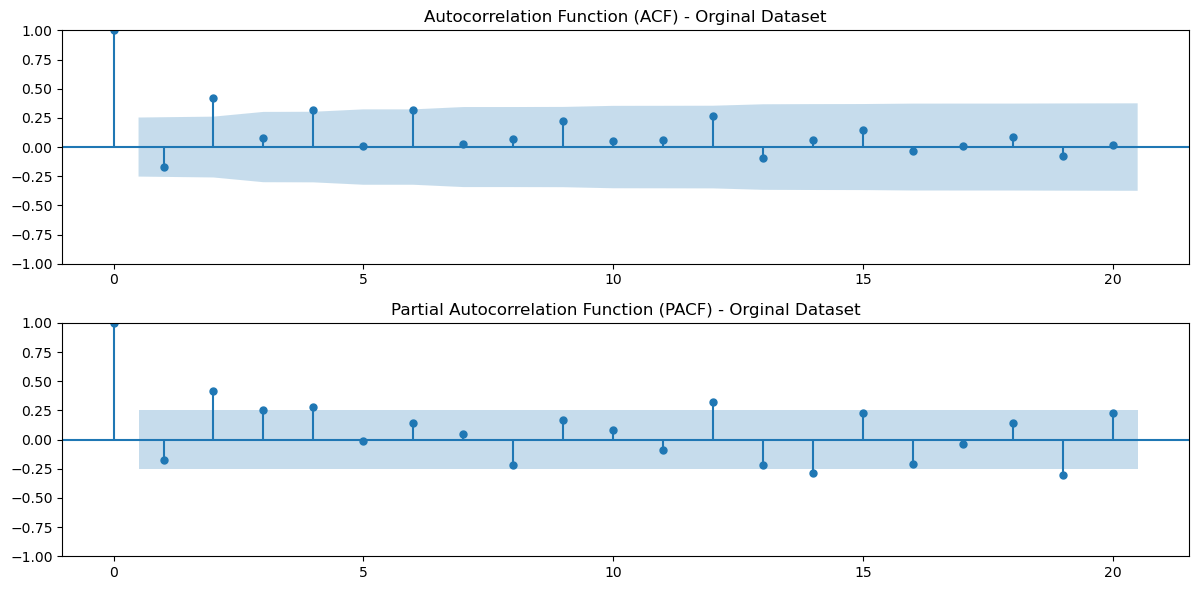

In [11]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_c, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [12]:
train= sales_c[:54]
test=sales_c[54:]

In [13]:
print(len(train),len(test))

54 6


In [14]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q))
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_c)-1))
        mae = mean_absolute_error(test, pred)
        mape = np.mean(np.abs((test - pred) / test)) * 100
        mse=mean_squared_error(test, pred)
        rmse = np.sqrt(mean_squared_error(test, pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [15]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic            mae           mse           rmse
7   2  1  1492.495658  1502.440579  140767.806088  3.313145e+10  182020.462815
11  3  2  1492.959674  1506.882562  140191.231153  3.612612e+10  190068.718949
5   1  2  1493.485329  1503.430249  171477.501057  4.605506e+10  214604.435422
8   2  2  1493.833052  1505.766956  153985.949428  3.805259e+10  195070.722562
10  3  1  1494.082105  1506.016009  153457.415958  3.835756e+10  195850.870309
12  4  0  1495.184679  1507.118583  123594.348279  2.645552e+10  162651.517865
13  4  1  1495.638820  1509.561708  145493.572450  3.377478e+10  183779.172086
15  5  0  1497.090912  1511.013800  125423.797939  2.764885e+10  166279.426625
14  4  2  1497.165671  1513.077544  133015.645511  2.821450e+10  167971.709543
16  5  1  1497.481806  1513.393678  136985.164694  3.040294e+10  174364.390247
9   3  0  1497.546172  1507.491092  168279.307036  5.131448e+10  226526.987531
17  5  2  1499.019990  1516.920846  131944.852202  2

In [16]:
#combination p=(0,1,2,3,4,5) d=0 q=(0,1,2) must be tested with accuracy metrics and aic

In [17]:
#param = [(0,0,0),(0,0,1),(0,0,2),(1,0,0),(1,0,1),(1,0,2),(2,0,0), (2,0,1), (2,0,2),(3,0,0),(3,0,1),(3,0,2),(4,0,0),(4,0,1),(4,0,2),(5,0,0),(5,0,1),(5,0,2)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    # Calculate MAPE manually
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [18]:
m_arima= ARIMA (train, order=(2,0,1))
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -741.248
Date:                Thu, 09 May 2024   AIC                           1492.496
Time:                        16:09:40   BIC                           1502.441
Sample:                    01-01-2019   HQIC                          1496.331
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.448e+05   1.87e+05      3.992      0.000    3.79e+05    1.11e+06
ar.L1          0.4466      0.192      2.324      0.020       0.070       0.823
ar.L2          0.5171      0.167      3.093      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

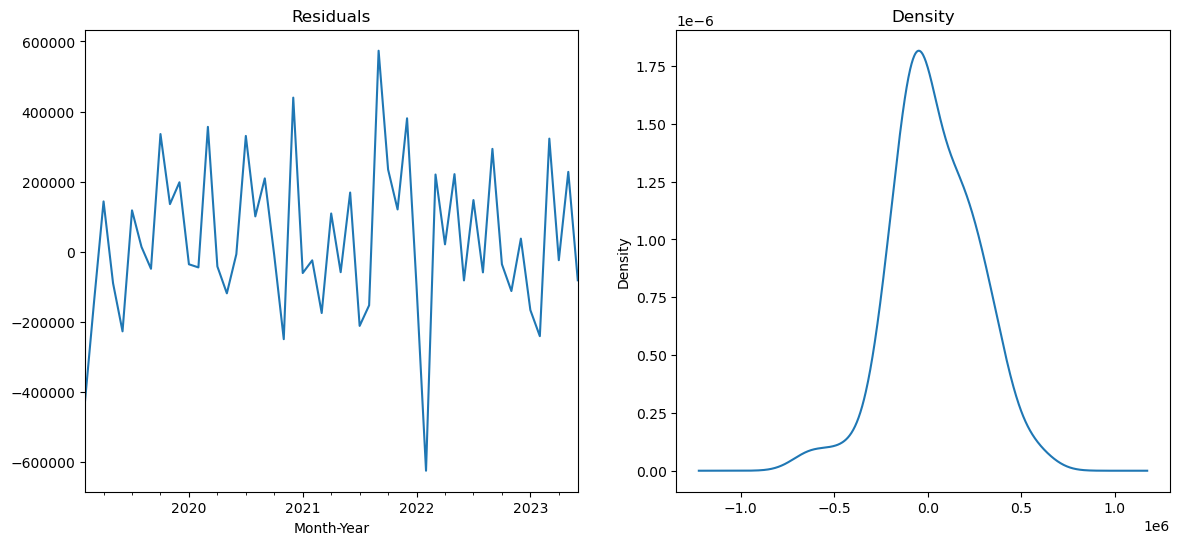

In [19]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show

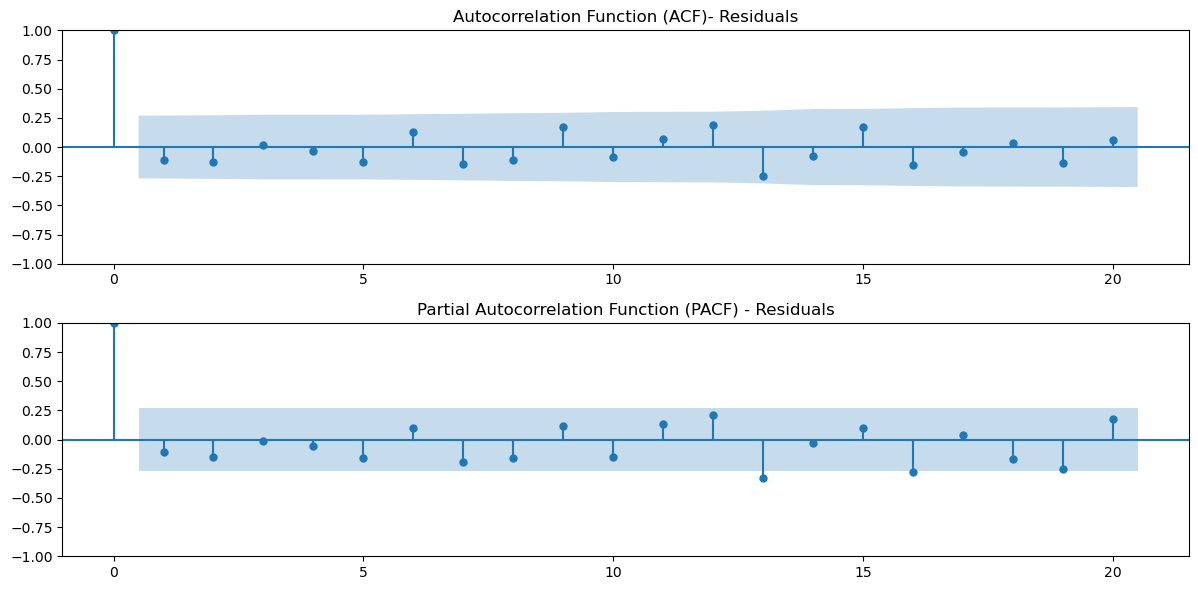

In [20]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

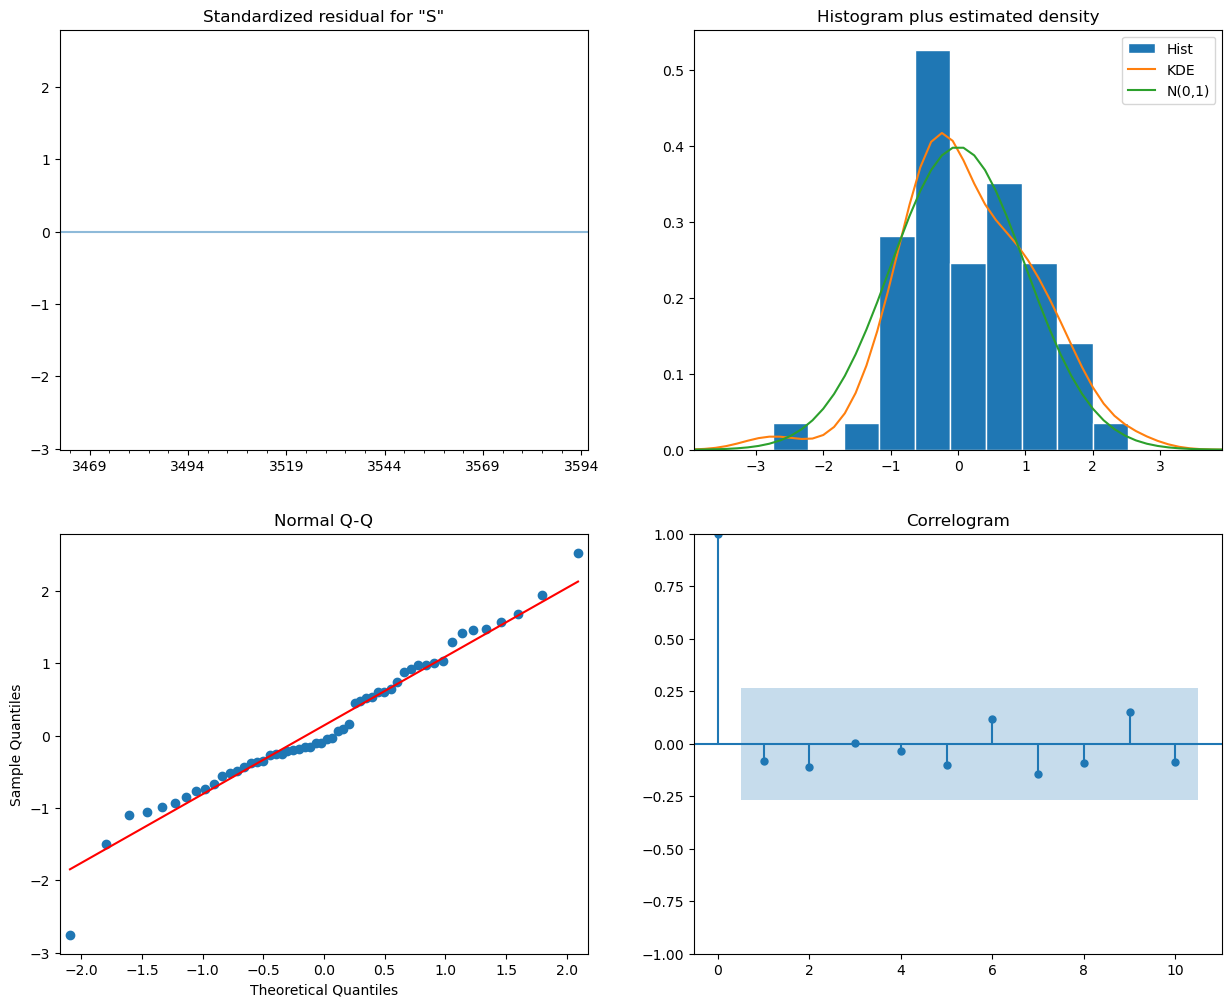

In [21]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [22]:
#pred=model.forecast(steps= len(test))
#sales_c['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_c.plot()

In [23]:
pred=model_arima.predict(start=len(train), end=(len(sales_c)-1), dynamic = True)
sales_c['Forecast_ARIMA']=[None]*len(train) + list(pred)

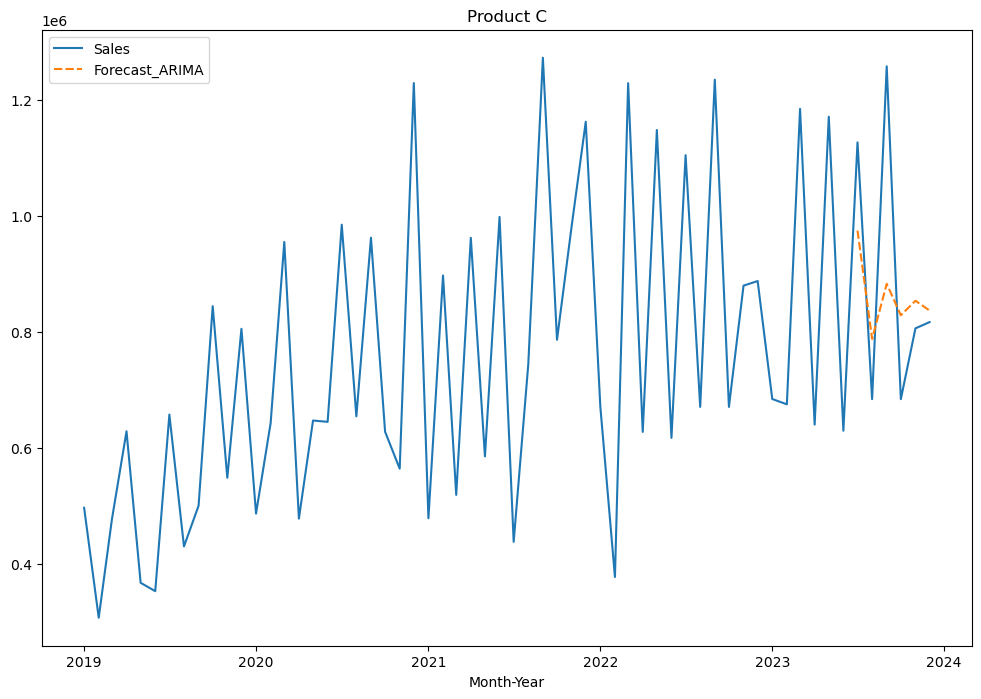

In [24]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_ARIMA']])
plt.title('Product C')
plt.show()

In [25]:
mae_arima= mean_absolute_error(test,pred)
mse_arima=mean_squared_error(test, pred)
mape_arima= mean_absolute_percentage_error(test,pred)
rmse_arima= np.sqrt(mean_squared_error(test,pred))

print(f'MAE - ARIMA: {mae_arima}')
print(f'MAPE - ARIMA: {mape_arima}')
print(f'MSE - ARIMA: {mse_arima}')
print(f'RMSE - ARIMA: {rmse_arima}')

MAE - ARIMA: 140767.80608783668
MAPE - ARIMA: 0.14686221884666387
MSE - ARIMA: 33131448883.35161
RMSE - ARIMA: 182020.46281490332


# SARIMA

In [26]:
import statsmodels.api as sm

In [27]:
# Plot
#fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
#axes[0].plot(sales_c['Sales'], label='Original Series')
#axes[0].plot(sales_c['Sales'].diff(1), label='Usual Differencing')
#axes[0].set_title('Usual Differencing')
#axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
#axes[1].plot(sales_c['Sales'], label='Original Series')
#axes[1].plot(sales_c['Sales'].diff(12), label='Seasonal Differencing', color='green')
#axes[1].set_title('Seasonal Differencing')
#plt.legend(loc='upper left', fontsize=10)
#plt.suptitle('Product C', fontsize=16)
#plt.show()

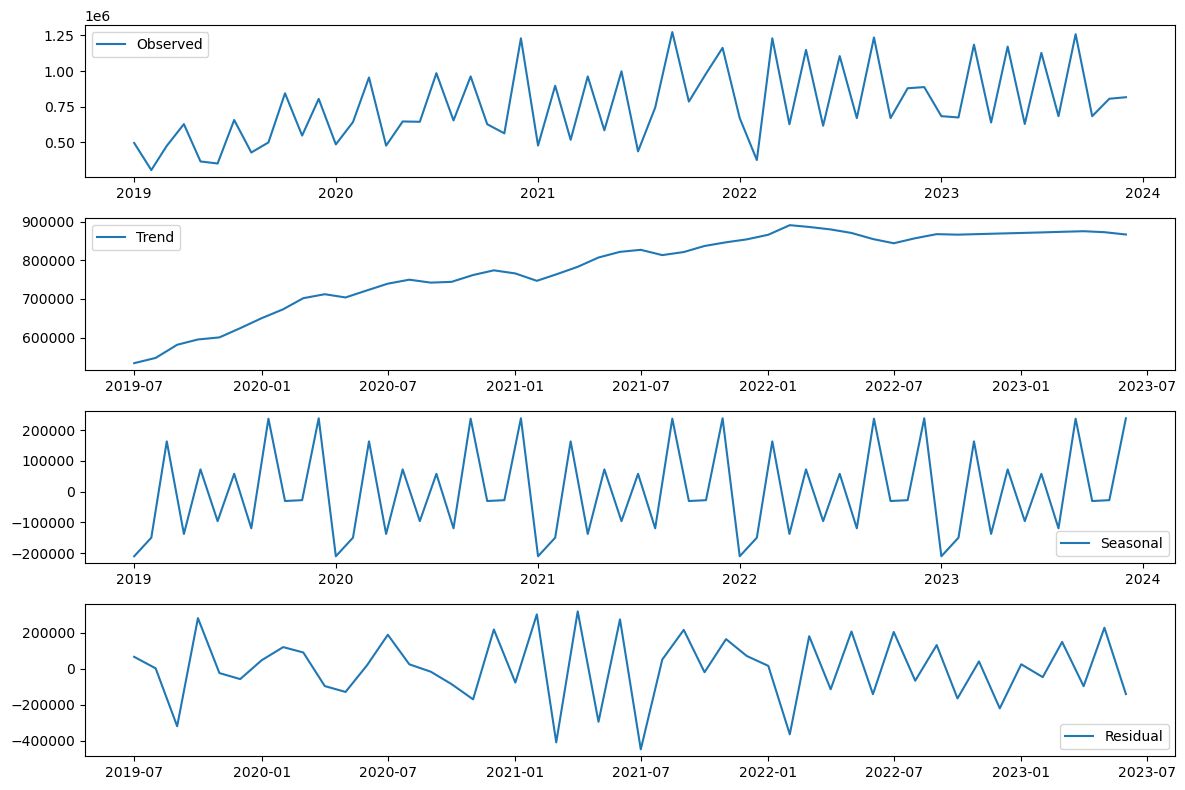

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_c['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

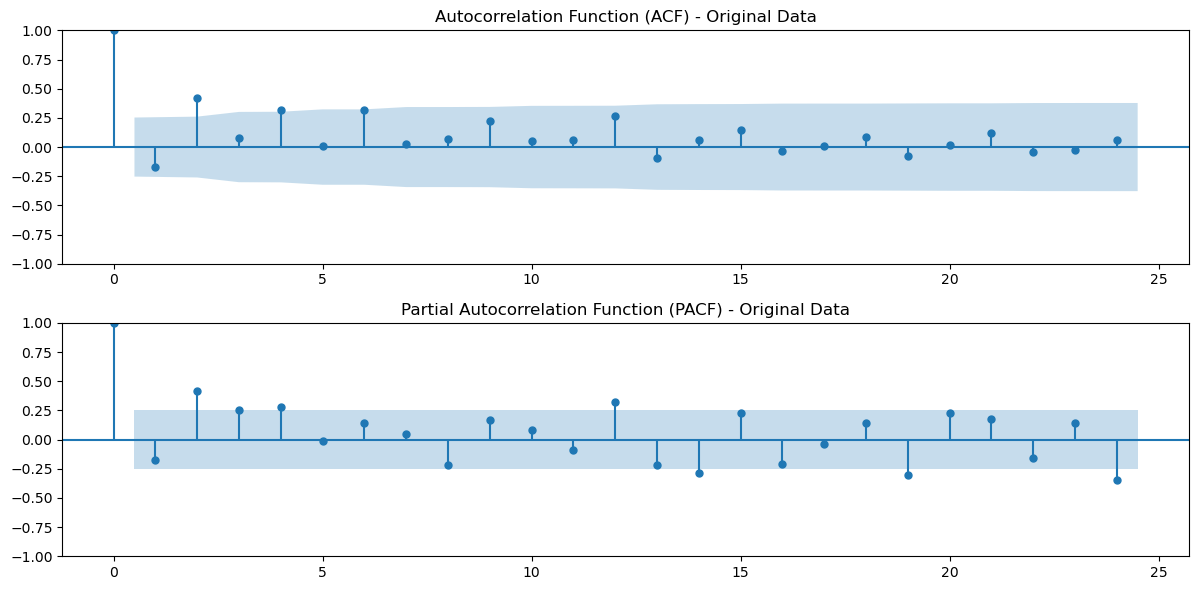

In [29]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [30]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(3):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(2, 0, 1), seasonal_order=(P, 0, Q, 12))
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=54, end=59, dynamic=True)
        mae = mean_absolute_error(test, pred)
        mse = mean_squared_error(test, pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])

In [31]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic            mae           mse
3   1  0  1494.061506  1504.006426  113855.700387  1.919914e+10
1   0  1  1494.460280  1504.405201  116825.291247  2.229328e+10
0   0  0  1494.518578  1502.474514  143968.966660  3.241325e+10
4   1  1  1495.499949  1507.433854  120666.880502  1.692401e+10
6   2  0  1495.533397  1507.467301  120179.936009  1.684259e+10
2   0  2  1495.810807  1507.744712  121399.625713  1.922528e+10
9   3  0  1497.420261  1511.343149  118989.643089  1.607678e+10
5   1  2  1497.455554  1511.378442  121122.914208  1.659410e+10
7   2  1  1497.462930  1511.385818  121388.749511  1.672212e+10
12  4  0  1499.393922  1515.305794  113338.712730  1.470846e+10
10  3  1  1499.401399  1515.313272  115080.142279  1.511158e+10
8   2  2  1499.427797  1515.339669  120112.643099  1.630262e+10
11  3  2  1501.395567  1519.296423  114088.359296  1.488522e+10
13  4  1  1501.418540  1519.319396  119409.367326  1.613717e+10
14  4  2  1503.393769  1523.283610  1135

In [32]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(2, 0, 1),seasonal_order=(1,0,0,12))
sarima_model=sarima.fit()

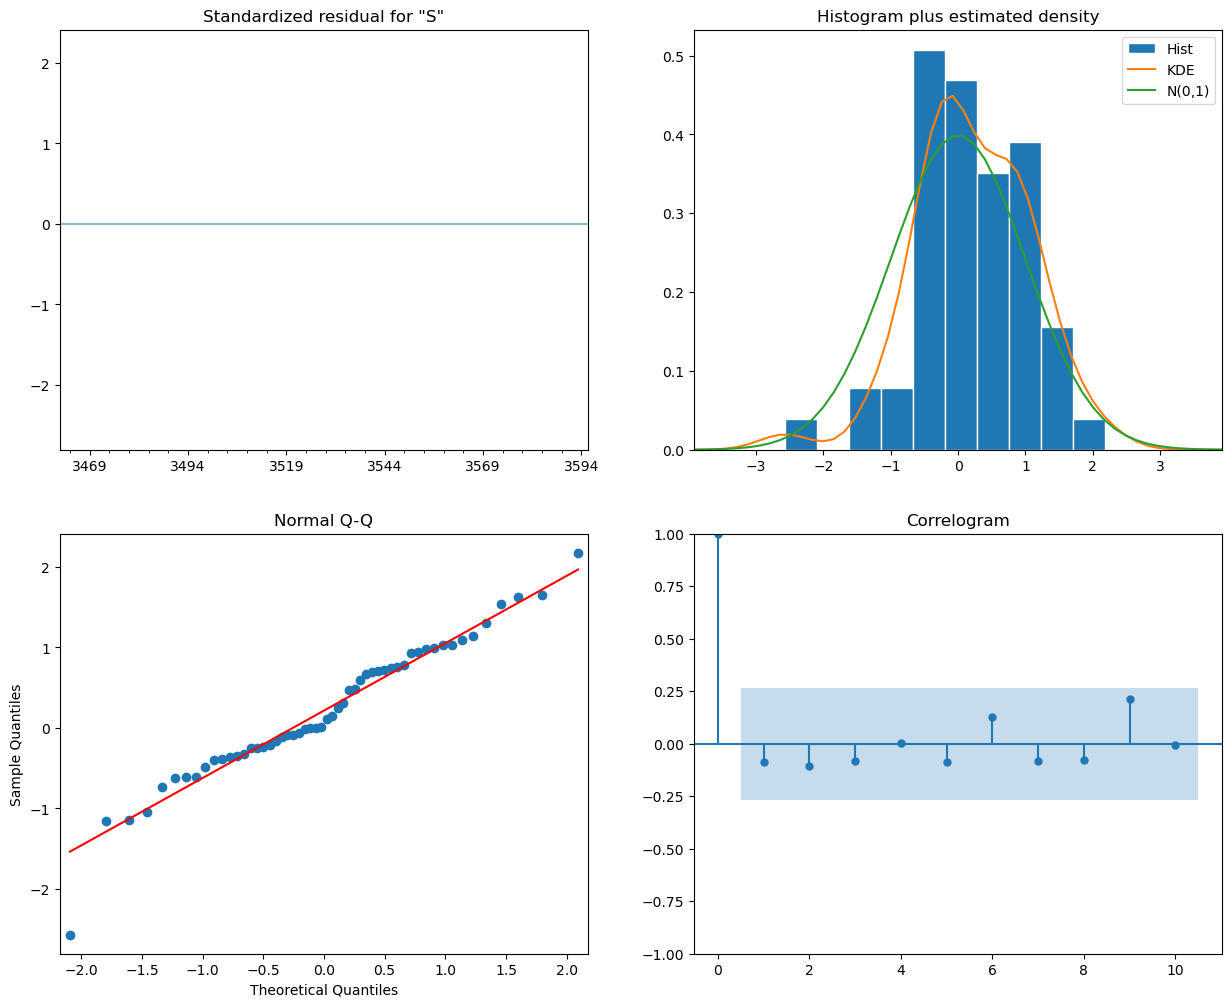

In [33]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [34]:
forecast_test_sarima=sarima_model.predict(start=54,end=59,dynamic=True)

In [35]:
sales_c['Forecast_SARIMA']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product C')

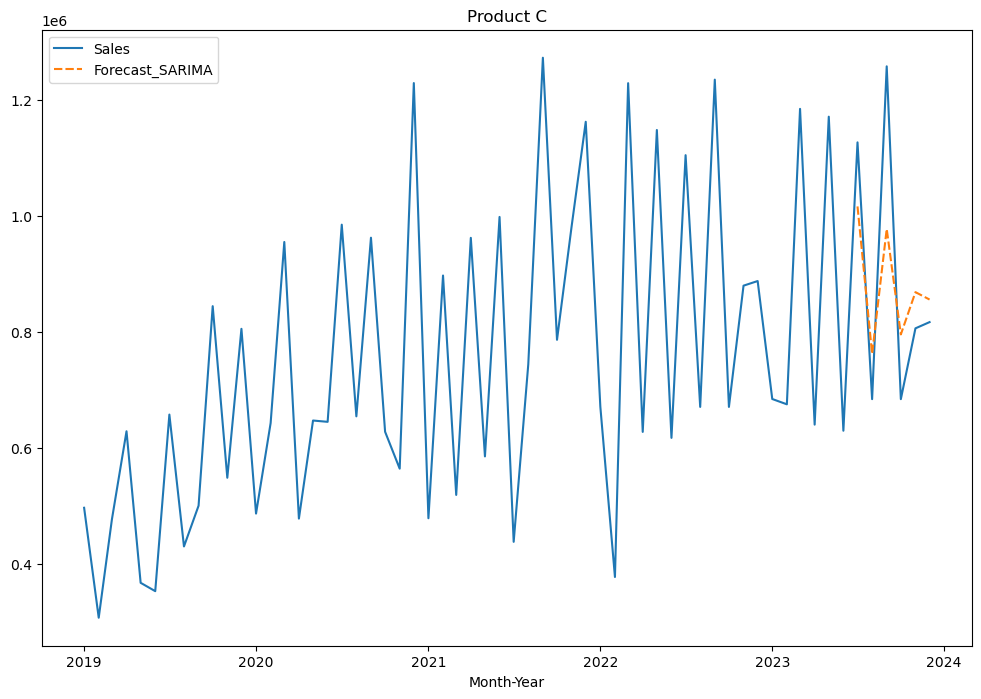

In [36]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_SARIMA']])
plt.title('Product C')

In [37]:
mae_sarima= mean_absolute_error(test,forecast_test_sarima)
mape_sarima= mean_absolute_percentage_error(test,forecast_test_sarima)
mse_sarima=mean_squared_error(test, forecast_test_sarima)
rmse_sarima= np.sqrt(mean_squared_error(test,forecast_test_sarima))

print(f'MAE - SARIMA: {round(mae_sarima,3)}')
print(f'MAPE - SARIMA: {round(mape_sarima,3)}')
print(f'MSE - SARIMA: {round(mse_sarima,3)}')
print(f'RMSE - SARIMA: {round(rmse_sarima,3)}')

MAE - SARIMA: 113855.7
MAPE - SARIMA: 0.121
MSE - SARIMA: 19199136076.481
RMSE - SARIMA: 138560.947


# AUTO-ARIMA

In [38]:
import pmdarima as pm

In [39]:
auto_arima= pm.auto_arima(train, start_p=0, d=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=0, start_Q=0, max_P=5 ,max_Q=3 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1505.328, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1505.028, Time=0.06 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1506.693, Time=0.17 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1508.691, Time=0.45 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1507.117, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1507.022, Time=0.21 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1508.670, Time=0.27 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1510.668, Time=0.66 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1508.132, Time=0.23 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1508.759, Time=0.46 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1510.387, Time=1.08 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=1512.319, Time=2.36 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=1508.996, Time=0.78 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=1510.652, Time=0.96 sec
 ARIMA(0,0,0)(3,0,2)[12] intercept   : AIC=1512.360, Time=3.34

ARIMA(order=(4, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [135]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   54
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -581.312
Date:                              Mon, 29 Apr 2024   AIC                           1172.624
Time:                                      15:20:27   BIC                           1181.312
Sample:                                  01-01-2019   HQIC                          1175.808
                                       - 06-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.113e+05   5.69e+04      1.956      0.051    -251.910    2.23e+05
ar.L1         -0.1724      0.222     -0.777      0.437      -0.608       0.263
ar.L2          0.4152      0.196      2.123      0.034       0.032       0.799
ma.S.L12      -0.5368      0.359     -1.495      0.135      -1.241       0.167
sigma2      7.096e+10      0.053   1.34e+12      0.000     7.1e+10     7.1e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.79   Prob(JB):                         0.43
Heteroskedasticity (H):               0.34   Skew:                             0.44
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.17e+27. Standard errors may be unstable.
"""

In [ ]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [136]:
forecast_test_auto= auto_arima.predict(n_periods=len(test))
sales_c['Forecast_AUTO ARIMA']=[None]*len(train)+ list(forecast_test_auto)
#sales_c[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product C')

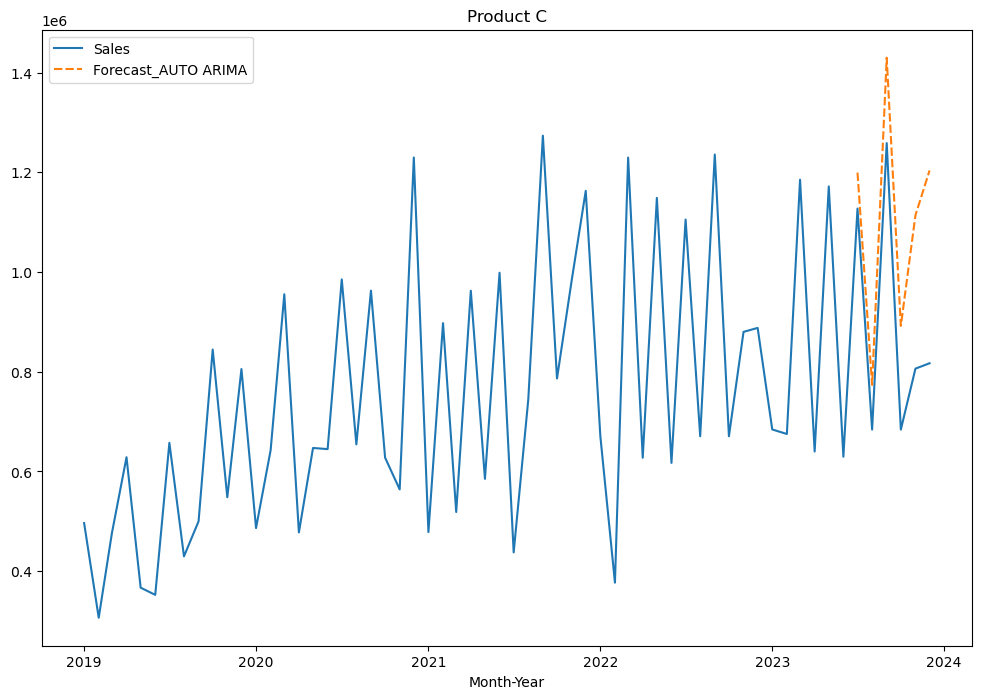

In [137]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMA']])
plt.title('Product C')

In [138]:
mae_auto_arima= mean_absolute_error(test,forecast_test_auto)
mape_auto_arima= mean_absolute_percentage_error(test,forecast_test_auto)
mse_auto_arima=mean_squared_error(test,forecast_test_auto)
rmse_auto_arima= np.sqrt(mean_squared_error(test,forecast_test_auto))

print(f'MAE - AUTO ARIMA: {mae_auto_arima}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima}')

MAE - AUTO ARIMA: 205910.97884672985
MAPE - AUTO ARIMA: 0.2483748096270408
MSE - AUTO ARIMA: 55021504474.63651
RMSE - AUTO ARIMA: 234566.63120451834


In [139]:
sales_c.tail(12)

,Sales,Forecast_ARIMA,Forecast_SARIMA,Forecast_AUTO ARIMA
Month-Year,,,,
2023-01-01,684175,NaN,NaN,NaN
2023-02-01,675038,NaN,NaN,NaN
2023-03-01,1185258,NaN,NaN,NaN
2023-04-01,639923,NaN,NaN,NaN
2023-05-01,1171761,NaN,NaN,NaN
2023-06-01,629400,NaN,NaN,NaN
2023-07-01,1127413,975029.338658,1.061006e+06,1.199502e+06
2023-08-01,683935,787937.691515,7.032789e+05,7.735616e+05
2023-09-01,1258717,883125.057711,1.258592e+06,1.429982e+06


In [140]:
sales_c.mean()

Sales                  7.599849e+05
Forecast_ARIMA         8.609753e+05
Forecast_SARIMA        9.596333e+05
Forecast_AUTO ARIMA    1.102110e+06
dtype: float64

In [141]:
data = {
    'model': ['ARIMA', 'AUTO ARIMA', 'SEASONAL ARIMA'],
    'MAE': [mae_arima, mae_auto_arima, mae_sarima],  
    'MAPE': [mape_arima, mape_auto_arima, mape_sarima],  
    'MSE': [mse_arima, mse_auto_arima, mse_sarima],  
    'RMSE': [rmse_arima, rmse_auto_arima, rmse_sarima]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMA,140767.806088,0.146862,3.313145e+10,182020.462815
AUTO ARIMA,205910.978847,0.248375,5.502150e+10,234566.631205
SEASONAL ARIMA,85611.457224,0.105298,1.304383e+10,114209.581957


# TESTING

In [14]:
auto_arima_1= pm.auto_arima(train, start_p=0, d=None, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=None, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1522.425, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1523.705, Time=0.07 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1525.704, Time=0.19 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1523.699, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1525.698, Time=0.23 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1527.689, Time=0.41 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1525.699, Time=0.10 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1527.699, Time=0.17 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1485.521, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1485.167, Time=0.11 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1486.936, Time=0.21 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1487.290, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,1

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [18]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -726.754
Date:                            Wed, 08 May 2024   AIC                           1463.508
Time:                                    18:44:33   BIC                           1473.359
Sample:                                01-01-2019   HQIC                          1467.296
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.816e+04   1.19e+04      2.368      0.018    4848.790    5.15e+04
ar.L1         -0.6005      0.160     -3.763      0.000      -0.913      -0.288
ma.L1         -0.7394      0.121     -6.114      0.000      -0.976      -0.502
ma.S.L12       0.2219      0.199      1.113      0.266      -0.169       0.613
sigma2      5.206e+10      0.007   7.29e+12      0.000    5.21e+10    5.21e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.83
Prob(Q):                              0.93   Prob(JB):                         0.15
Heteroskedasticity (H):               1.86   Skew:                            -0.45
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.7e+28. Standard errors may be unstable.
"""

In [19]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test))
sales_c['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product C')

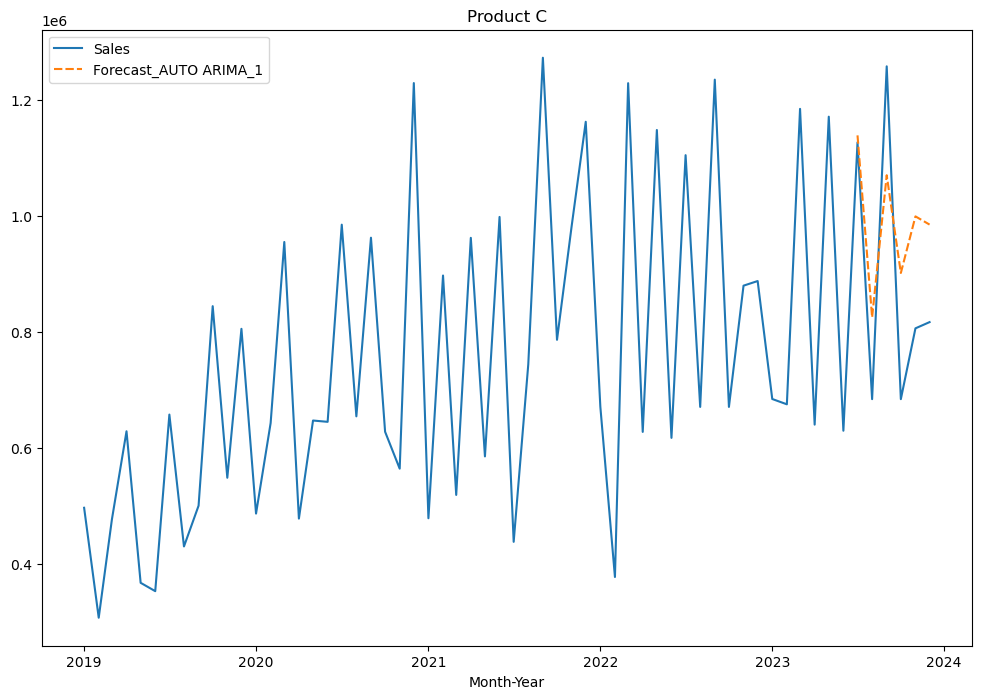

In [20]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product C')

In [21]:
mae_auto_arima_1= mean_absolute_error(test,forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test,forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test,forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test,forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 153487.22882252125
MAPE - AUTO ARIMA: 0.1885010746012817
MSE - AUTO ARIMA: 28109729669.278027
RMSE - AUTO ARIMA: 167659.56480105163
